## Loading Libraries

In [1]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import os
import datetime as dt
import matplotlib.pyplot as plt

## Gathering Live Data
<ul>
    <li>Collecting live data from USGS.gov (United States Geological Survey)</li>
    <li>Using Aws services like Amazon EventBridge, Lambda  to collect live-data periodically at midnight(cron-job).</li>
    <li>Using S3 to store data in json format and converting it into .csv file.</li>
    <li>Merging Historical data with live Data and creating the final dataset.</li>
</ul>

In [2]:
# Historical Data from USGS
df1=pd.read_csv('h1.csv')
df2=pd.read_csv('h2.csv')
df3=pd.read_csv('h3.csv')
df4=pd.read_csv('h4.csv')
df5=pd.read_csv('h5.csv')
df6=pd.read_csv('h6.csv')
df7=pd.read_csv('h7.csv')
df8=pd.read_csv('h8.csv')
df9=pd.read_csv('h9.csv')
df10=pd.read_csv('h10.csv')
df11=pd.read_csv('h11.csv')
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
df.shape

(119841, 22)

In [3]:
df.drop_duplicates(subset=['time'])
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-10-31T17:18:03.640Z,33.684000,-116.754833,14.63,1.04,ml,38.0,45.00,0.043400,0.1500,...,2022-10-31T18:43:32.770Z,"7km SSW of Idyllwild, CA",earthquake,0.23,0.30,0.152,28.0,reviewed,ci,ci
1,2022-10-31T17:12:25.837Z,53.968000,-166.513900,13.10,0.90,ml,NaN,NaN,NaN,0.5000,...,2022-11-18T20:09:03.920Z,"8 km NNE of Dutch Harbor, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak
2,2022-10-31T17:08:26.522Z,51.722400,-178.535600,6.70,1.30,ml,NaN,NaN,NaN,0.4200,...,2022-11-18T20:09:05.683Z,"132 km W of Adak, Alaska",earthquake,NaN,0.70,NaN,NaN,reviewed,ak,ak
3,2022-10-31T17:02:37.070Z,37.302667,-121.671667,6.79,0.92,md,16.0,46.00,0.043620,0.0700,...,2022-10-31T23:03:15.811Z,"15km E of Seven Trees, CA",earthquake,0.27,0.47,0.189,16.0,reviewed,nc,nc
4,2022-10-31T17:02:26.899Z,34.499833,-97.276000,0.00,1.18,ml,42.0,120.00,0.086383,0.4300,...,2022-10-31T18:28:58.951Z,"11 km SE of Katie, Oklahoma",quarry blast,NaN,0.60,0.220,19.0,reviewed,ok,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,2022-01-01T00:08:48.730Z,34.051167,-117.213833,14.00,1.61,ml,55.0,50.00,0.070070,0.1300,...,2022-01-07T00:10:49.500Z,"3km W of Redlands, CA",earthquake,0.13,0.36,0.174,23.0,reviewed,ci,ci
7637,2022-01-01T00:05:51.536Z,40.148400,-119.636000,5.20,1.40,ml,9.0,179.27,0.077000,0.1461,...,2022-01-04T18:49:04.397Z,"22 km N of Sutcliffe, Nevada",earthquake,NaN,1.50,0.350,8.0,reviewed,nn,nn
7638,2022-01-01T00:04:07.650Z,33.319000,-116.849833,10.58,1.00,ml,30.0,41.00,0.036150,0.1400,...,2022-01-07T00:01:56.573Z,"4km SSE of Palomar Observatory, CA",earthquake,0.18,0.37,0.156,17.0,reviewed,ci,ci
7639,2022-01-01T00:02:24.512Z,-17.026900,-174.214200,60.87,4.60,mb,NaN,85.00,3.886000,0.1700,...,2022-03-12T22:19:16.040Z,"126 km SSW of Hihifo, Tonga",earthquake,12.60,6.40,0.273,4.0,reviewed,us,us


In [4]:
df.to_csv('historical_data_eq2022.csv',index=False)

In [5]:
# Downloading data from aws3 
import boto3
s3= boto3.client('s3')
bucket_name='eq-data-csv-to-json-cron-job'
fileName = 'eq_data_csv_to_json_format.json'
fName='C:/Users/ratup/Desktop/ASP/DataSets/USGSgov/eq_json_format_data.json'
s3.download_file(Bucket=bucket_name,Key=fileName,Filename=fName)

df=pd.read_json(fName)
s=df.to_csv('all_month.csv',index=None)

In [6]:
df0=pd.read_csv('historical_data_eq2022.csv')
df1=pd.read_csv('all_month.csv')


In [7]:
df=pd.concat([df1,df0])
df.to_csv('final_dataset.csv',index=False)
df=pd.read_csv('final_dataset.csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-01T05:52:55.249Z,63.528900,-147.656400,17.70,1.30,ml,NaN,NaN,NaN,0.3300,...,2022-12-01T05:55:32.256Z,"66 km ENE of Cantwell, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2022-12-01T05:51:24.102Z,61.999300,-147.671600,37.00,1.30,ml,NaN,NaN,NaN,0.7300,...,2022-12-01T05:53:23.931Z,"21 km N of Glacier View, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
2,2022-12-01T05:42:28.760Z,38.834999,-122.816834,1.68,0.92,md,11.0,72.00,0.01273,0.0100,...,2022-12-01T05:53:11.021Z,"8km W of Cobb, CA",earthquake,0.27,0.80,NaN,1.0,automatic,nc,nc
3,2022-12-01T05:28:57.530Z,32.501833,-116.831833,11.87,1.57,ml,19.0,180.00,0.11500,0.2600,...,2022-12-01T05:32:35.729Z,"18km E of Tijuana, B.C., MX",earthquake,1.18,1.69,0.163,11.0,automatic,ci,ci
4,2022-12-01T05:27:21.260Z,19.155834,-155.467163,31.98,2.15,md,41.0,167.00,NaN,0.1100,...,2022-12-01T05:30:45.890Z,"5 km SSE of Pāhala, Hawaii",earthquake,0.63,0.87,0.730,17.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130189,2022-01-01T00:08:48.730Z,34.051167,-117.213833,14.00,1.61,ml,55.0,50.00,0.07007,0.1300,...,2022-01-07T00:10:49.500Z,"3km W of Redlands, CA",earthquake,0.13,0.36,0.174,23.0,reviewed,ci,ci
130190,2022-01-01T00:05:51.536Z,40.148400,-119.636000,5.20,1.40,ml,9.0,179.27,0.07700,0.1461,...,2022-01-04T18:49:04.397Z,"22 km N of Sutcliffe, Nevada",earthquake,NaN,1.50,0.350,8.0,reviewed,nn,nn
130191,2022-01-01T00:04:07.650Z,33.319000,-116.849833,10.58,1.00,ml,30.0,41.00,0.03615,0.1400,...,2022-01-07T00:01:56.573Z,"4km SSE of Palomar Observatory, CA",earthquake,0.18,0.37,0.156,17.0,reviewed,ci,ci
130192,2022-01-01T00:02:24.512Z,-17.026900,-174.214200,60.87,4.60,mb,NaN,85.00,3.88600,0.1700,...,2022-03-12T22:19:16.040Z,"126 km SSW of Hihifo, Tonga",earthquake,12.60,6.40,0.273,4.0,reviewed,us,us


## Features in the dataset
<ul>
    <li>time ---- Time when the event occurred. Times are reported in milliseconds since the epoch. </li> 
    <li>latitude ---- Decimals degrees latitude. Negative values for southern latitudes. </li>
    <li>longitutde ----Decimals degrees longitude. Negative values for western longitudes. </li>
    <li>depth ---- Depth of the event in kilometers.</li>
    <li>mag ---- Magnitude of event occurred.</li>
    <li>magType ---- The method or algorithm used to calculate the preferreds magnitude.</li>
    <li>nst ---- The total number ofseismic stations used to determine earthquake locations. </li>
    <li>gap ---- The largest azimuthal gap between azimuthally adjacent stations (in degrees).</li>
    <li>dmin ---- Horizontal distance from the epicenter to the nearest station (in degrees).</li>
    <li>rms ---- The root-mean-square (RMS) travel time residual, in sec, using all weights.</li>
    <li>net ---- The ID of data source contributor for event occured.</li>
    <li>id ---- A unique identifier for the event.</li>
    <li>types ---- A comma-seperated list of product types associated to this event.</li>
    <li>place ---- named geographic region near to the event.</li>
    <li>type ---- Type of seismic event.</li>
    <li>locationSource ---- The network that originally authored the reported the location of this event.</li>
    <li>magSource ---- Network that orginally authored the reported magnitude for this event.</li>
    <li>horizontalError ---- Uncertainty of reported location of the event in kilometers.</li>
    <li>depthError---- The depth erroe, three princcipal errora on a vertical line.</li>
    <li>magError ---- Uncertainty of reported magnitude of the event.</li>
    <li>magNst ---- The total number of seismic stations to calculate the magnitude of earthquake.</li>
    <li>status ---- Indicates whether the event has been reviewed by a human.</li>
</ul>

In [8]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-01T05:52:55.249Z,63.528900,-147.656400,17.70,1.30,ml,NaN,NaN,NaN,0.33,...,2022-12-01T05:55:32.256Z,"66 km ENE of Cantwell, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2022-12-01T05:51:24.102Z,61.999300,-147.671600,37.00,1.30,ml,NaN,NaN,NaN,0.73,...,2022-12-01T05:53:23.931Z,"21 km N of Glacier View, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
2,2022-12-01T05:42:28.760Z,38.834999,-122.816834,1.68,0.92,md,11.0,72.0,0.01273,0.01,...,2022-12-01T05:53:11.021Z,"8km W of Cobb, CA",earthquake,0.27,0.80,NaN,1.0,automatic,nc,nc
3,2022-12-01T05:28:57.530Z,32.501833,-116.831833,11.87,1.57,ml,19.0,180.0,0.11500,0.26,...,2022-12-01T05:32:35.729Z,"18km E of Tijuana, B.C., MX",earthquake,1.18,1.69,0.163,11.0,automatic,ci,ci
4,2022-12-01T05:27:21.260Z,19.155834,-155.467163,31.98,2.15,md,41.0,167.0,NaN,0.11,...,2022-12-01T05:30:45.890Z,"5 km SSE of Pāhala, Hawaii",earthquake,0.63,0.87,0.730,17.0,automatic,hv,hv


In [9]:
df.shape

(130194, 22)

In [10]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,130194.000000,130194.000000,130194.000000,130192.000000,86105.000000,93016.000000,77221.000000,130194.000000,83558.000000,130194.000000,88683.000000,92892.000000
mean,39.108100,-110.854981,27.412120,1.748165,23.777307,120.100097,0.865869,0.318189,2.213704,2.326215,0.260685,15.254640
std,21.041793,74.497891,57.681147,1.205964,21.928043,65.339873,2.643835,0.267222,3.509677,45.229775,0.505109,27.872198
min,-69.773900,-179.999700,-3.740000,-1.600000,0.000000,10.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.493500,-151.928250,4.530000,0.930000,10.000000,70.000000,0.025560,0.110000,0.280000,0.400000,0.100409,4.000000
50%,38.821333,-122.760333,10.000000,1.410000,17.000000,104.000000,0.073000,0.210000,0.530000,0.740000,0.153000,8.000000
75%,55.494525,-115.606708,26.085500,2.130000,30.000000,157.000000,0.355430,0.510000,1.970000,1.800000,0.230000,16.000000
max,86.647700,179.998100,664.700000,7.600000,492.000000,359.000000,49.154000,2.820000,99.000000,15982.200000,6.190000,761.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130194 entries, 0 to 130193
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             130194 non-null  object 
 1   latitude         130194 non-null  float64
 2   longitude        130194 non-null  float64
 3   depth            130194 non-null  float64
 4   mag              130192 non-null  float64
 5   magType          130192 non-null  object 
 6   nst              86105 non-null   float64
 7   gap              93016 non-null   float64
 8   dmin             77221 non-null   float64
 9   rms              130194 non-null  float64
 10  net              130194 non-null  object 
 11  id               130194 non-null  object 
 12  updated          130194 non-null  object 
 13  place            128924 non-null  object 
 14  type             130194 non-null  object 
 15  horizontalError  83558 non-null   float64
 16  depthError       130194 non-null  floa

**Finding out the features which are list important and having many null values.So, that we can select best features for feature engineering and data wrangling.**

In [12]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    2
magType                2
nst                44089
gap                37178
dmin               52973
rms                    0
net                    0
id                     0
updated                0
place               1270
type                   0
horizontalError    46636
depthError             0
magError           41511
magNst             37302
status                 0
locationSource         0
magSource              0
dtype: int64

**Visualize latitude and longitude features from dataframe to see where the points fall from the feature set.**

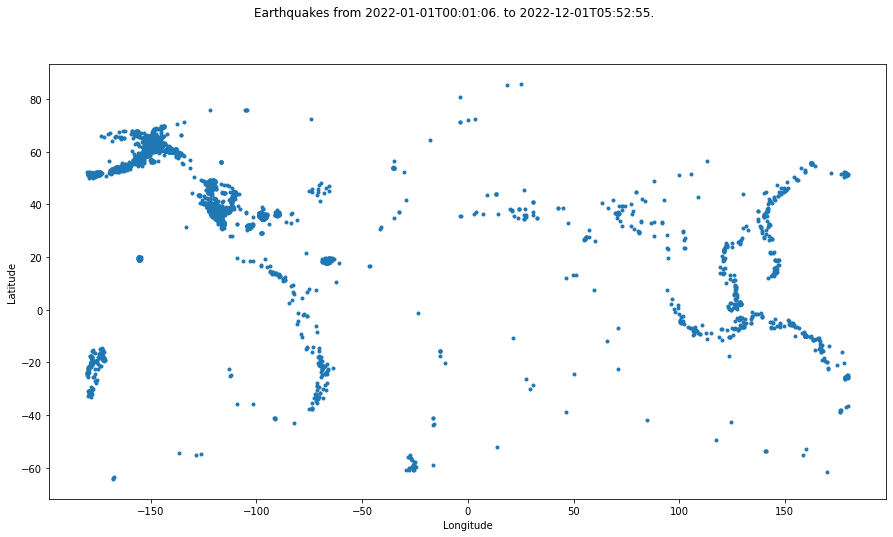

In [13]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))

# latitude and longitude of earthquake site of top 10500 samples.
plt.plot(np.round(df['longitude'].head(10500),rounding_factor), 
         np.round(df['latitude'].head(10500),rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(df['time']))[:20] + ' to ' + str(np.max(df['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Extracting Date from time column.**

In [14]:
df = df.sort_values('time', ascending=True)

#Date extraction
df['date'] = df['time'].str[0:10]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
130193,2022-01-01T00:01:06.780Z,35.982667,-120.537500,1.41,0.51,md,13.0,91.00,0.01905,0.0600,...,"13km NW of Parkfield, CA",earthquake,0.23,0.48,0.467,4.0,reviewed,nc,nc,2022-01-01
130192,2022-01-01T00:02:24.512Z,-17.026900,-174.214200,60.87,4.60,mb,NaN,85.00,3.88600,0.1700,...,"126 km SSW of Hihifo, Tonga",earthquake,12.60,6.40,0.273,4.0,reviewed,us,us,2022-01-01
130191,2022-01-01T00:04:07.650Z,33.319000,-116.849833,10.58,1.00,ml,30.0,41.00,0.03615,0.1400,...,"4km SSE of Palomar Observatory, CA",earthquake,0.18,0.37,0.156,17.0,reviewed,ci,ci,2022-01-01
130190,2022-01-01T00:05:51.536Z,40.148400,-119.636000,5.20,1.40,ml,9.0,179.27,0.07700,0.1461,...,"22 km N of Sutcliffe, Nevada",earthquake,NaN,1.50,0.350,8.0,reviewed,nn,nn,2022-01-01
130189,2022-01-01T00:08:48.730Z,34.051167,-117.213833,14.00,1.61,ml,55.0,50.00,0.07007,0.1300,...,"3km W of Redlands, CA",earthquake,0.13,0.36,0.174,23.0,reviewed,ci,ci,2022-01-01


**Data cleaning for seperating 'place' column.Hence only consider city by seperating string by ','.**

In [15]:
# only keep the columns needed
df = df[['date','time' ,'latitude', 'longitude', 'depth', 'mag', 'place']]
# df['date'] = df['time'].str.split(', ', expand=True) 
newdf = df['place'].str.split(', ', expand=True) 

In [16]:
newdf.head()

,0,1,2,3,4
130193,13km NW of Parkfield,CA,None,None,None
130192,126 km SSW of Hihifo,Tonga,None,None,None
130191,4km SSE of Palomar Observatory,CA,None,None,None
130190,22 km N of Sutcliffe,Nevada,None,None,None
130189,3km W of Redlands,CA,None,None,None


In [17]:
df['place'] = newdf[1]
df = df[['date','latitude', 'longitude', 'depth', 'mag', 'place']]

In [18]:
df.head()

,date,latitude,longitude,depth,mag,place
130193,2022-01-01,35.982667,-120.537500,1.41,0.51,CA
130192,2022-01-01,-17.026900,-174.214200,60.87,4.60,Tonga
130191,2022-01-01,33.319000,-116.849833,10.58,1.00,CA
130190,2022-01-01,40.148400,-119.636000,5.20,1.40,Nevada
130189,2022-01-01,34.051167,-117.213833,14.00,1.61,CA


In [19]:
print('total locations:',len(set(df['place'])))

total locations: 200


**Bar plot of mean magnitude vs place, as we can see from the graph, only few countries are considered as epicenter of dangerous since they have magnitude more than 2.8**

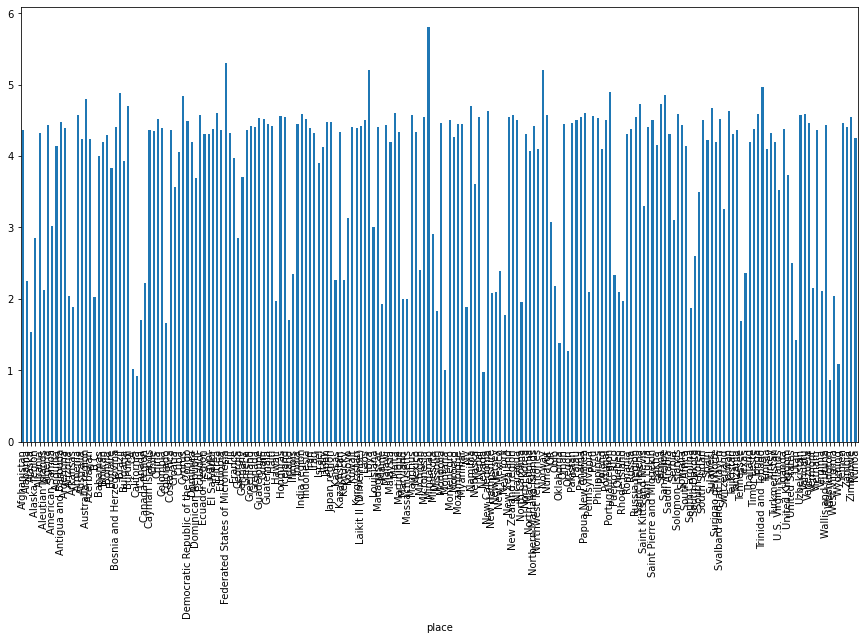

In [20]:
df.groupby(['place'])['mag'].mean().plot(kind='bar',figsize=(15,8));

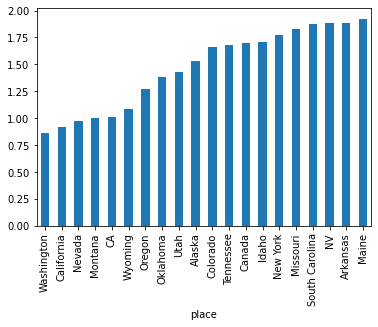

In [21]:
df.groupby(['place'])['mag'].mean().nsmallest(20).plot(kind='bar');

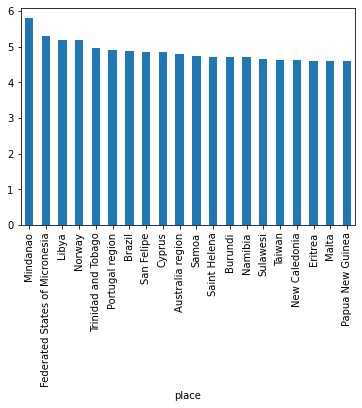

In [22]:
df.groupby(['place'])['mag'].mean().nlargest(20).plot(kind='bar');

**Lets consider 3 as threshold for how high the earthquake has hit and lets visualize countries with more than 3 magnitude.**

In [23]:
more_dangerous_places=df.groupby('place')['mag'].mean()
more_dangerous_places=more_dangerous_places[more_dangerous_places>3]

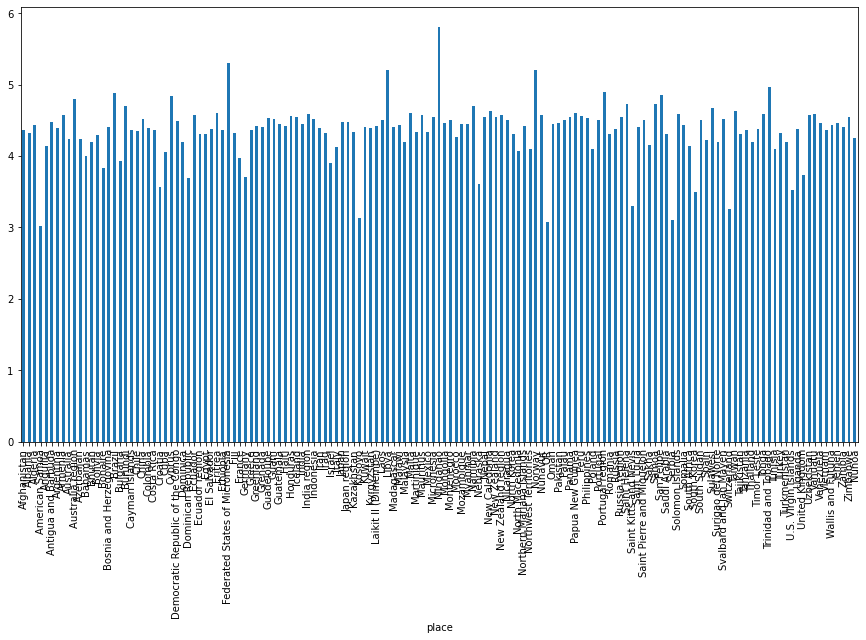

In [24]:
more_dangerous_places.plot(kind='bar',figsize= (15,8));

In [25]:
# calculate mean latitude and longitude for simplified locations

df_coords = df[['place','latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place','latitude', 'longitude']]

In [26]:
df_coords.head()

,place,latitude,longitude
0,Afghanistan,36.269245,70.586485
1,Alabama,34.417250,-86.234500
2,Alaska,59.242208,-151.928201
3,Alaska region,58.501700,-169.335100
4,Albania,41.074600,20.016543


**Merge the two dataframes of mean latitude and longitude locations calculated above with dataframe only considering ['date','depth','mag','place'] as columns out of total features**

In [27]:
df = df[['date','depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df.head()

print('total locations:',len(set(df['place'])))


total locations: 198


In [28]:
print(set(df['place']))

{'Japan', 'Saint Lucia', 'Tanzania', 'Spain', 'Panama', 'B.C.', 'South Korea', 'South Dakota', 'Puerto Rico', 'Norway', 'Oman', 'Guatemala', 'Italy', 'Taiwan', 'New Zealand', 'Egypt', 'Pakistan', 'Tennessee', 'Svalbard and Jan Mayen', 'Cayman Islands', 'Kosovo', 'Bolivia', 'Namibia', 'South Africa', 'Laikit II (Dimembe)', 'Solomon Islands', 'Zimbabwe', 'Wyoming', 'Ethiopia', 'Algeria', 'Maine', 'Bahamas', 'Tunisia', 'New Hampshire', 'New York', 'Uzbekistan', 'Turkmenistan', 'Montana', 'Kyrgyzstan', 'Vietnam', 'Russia region', 'Saudi Arabia', 'Wallis and Futuna', 'Israel', 'Saint Kitts and Nevis', 'Canada', 'United States', 'Turkey', 'Georgia', 'Surigao del Norte', 'Ecuador', 'Papua New Guinea', 'Australia', 'Alaska region', 'West Virginia', 'Nunavut', 'North Macedonia', 'New Jersey', 'Greenland', 'Colombia', 'Iran', 'Libya', 'Guadeloupe', 'Cuba', 'Romania', 'Massachusetts', 'France', 'Micronesia', 'Democratic Republic of the Congo', 'Michigan', 'Minnesota', 'Samoa', 'Hawaii', 'El Salva

In [29]:
df.head()

,date,depth,mag,place,latitude,longitude
0,2022-01-01,1.41,0.51,CA,36.571914,-119.880454
1,2022-01-01,10.58,1.00,CA,36.571914,-119.880454
2,2022-01-01,14.00,1.61,CA,36.571914,-119.880454
3,2022-01-01,1.71,1.09,CA,36.571914,-119.880454
4,2022-01-01,19.08,2.88,CA,36.571914,-119.880454


## Feature Engineering and Data Wrangling

<ul>
    <li>Set rolling window size for future prediction based on past values with fixed window size in past.</li>
    <li>I have created 6 new features based on rolling window size on average depth and average magnitude.</li>
    <li>A final outcome 'mag_outcome' has been defined as target values and the output is considered as shifted values from set rolling window of past days e.g:'7'</li>
</ul>

In [30]:
eq_tmp = df.copy()

#rolling window size
DAYS_OUT_TO_PREDICT = 7

# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    #avg. depth of 22 days rolling period and so on..
    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean() 
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean() 
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(DAYS_OUT_TO_PREDICT))

    eq_data.append(temp_df)

In [31]:
# concat all location-based dataframes into master dataframe
eq_all = pd.concat(eq_data)

In [32]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
103030,2022-01-01,10.00,4.6,Japan,33.299778,135.513876,NaN,NaN,NaN,NaN,NaN,NaN,4.428571
103031,2022-01-01,10.00,4.8,Japan,33.299778,135.513876,NaN,NaN,NaN,NaN,NaN,NaN,4.371429
103032,2022-01-01,98.80,4.4,Japan,33.299778,135.513876,NaN,NaN,NaN,NaN,NaN,NaN,4.357143
103033,2022-01-01,49.35,4.3,Japan,33.299778,135.513876,NaN,NaN,NaN,NaN,NaN,NaN,4.385714
103034,2022-01-02,61.80,4.3,Japan,33.299778,135.513876,NaN,NaN,NaN,NaN,NaN,NaN,4.385714


In [33]:
# remove any NaN fields
eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]

In [34]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
103051,2022-01-10,339.33,4.2,Japan,33.299778,135.513876,69.870000,85.812667,81.231429,4.354545,4.313333,4.357143,4.400000
103052,2022-01-10,84.74,4.3,Japan,33.299778,135.513876,73.267273,87.372000,87.670000,4.340909,4.300000,4.271429,4.457143
103053,2022-01-11,46.28,4.4,Japan,33.299778,135.513876,74.916364,86.615333,86.447143,4.322727,4.300000,4.314286,4.428571
103054,2022-01-11,34.49,4.6,Japan,33.299778,135.513876,71.993182,87.402667,86.284286,4.331818,4.320000,4.342857,4.357143
103055,2022-01-11,380.35,4.2,Japan,33.299778,135.513876,87.038636,111.248000,139.191429,4.327273,4.300000,4.342857,4.357143


**Location after feature engineering**

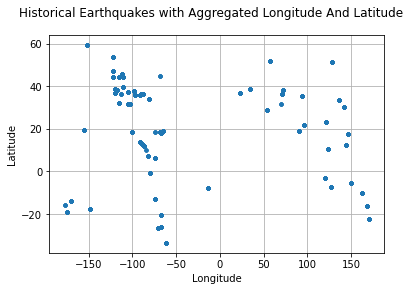

In [35]:
plt.plot(eq_all['longitude'], 
         eq_all['latitude'],
         linestyle='none', marker='.')
plt.suptitle('Historical Earthquakes with Aggregated Longitude And Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [36]:
# keep our live data for predictions
eq_data_last_days_out = pd.concat(eq_data_last_days_out)


eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['mag_avg_22'])]
predict_unknown=eq_data_last_days_out

In [37]:
# here 'mag_outcome' has NaN because these are future outcome event to be predicted live or data that has not yet been witnessed
predict_unknown

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
103930,2022-11-27,49.711,4.6,Japan,33.299778,135.513876,83.077636,89.482467,121.229286,4.540909,4.460000,4.600000,NaN
103931,2022-11-29,10.000,5.0,Japan,33.299778,135.513876,83.077636,89.482467,113.889571,4.568182,4.513333,4.671429,NaN
103932,2022-11-29,55.283,4.4,Japan,33.299778,135.513876,84.939636,92.501333,86.317857,4.527273,4.520000,4.614286,NaN
103933,2022-11-30,53.289,5.0,Japan,33.299778,135.513876,85.541909,95.401533,90.851571,4.563636,4.586667,4.585714,NaN
103934,2022-11-30,10.000,4.6,Japan,33.299778,135.513876,69.749136,91.681733,80.573429,4.495455,4.546667,4.642857,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111356,2022-11-04,114.016,4.3,Guam,12.533887,144.307219,101.198455,102.098533,119.982429,4.518182,4.533333,4.471429,NaN
111357,2022-11-05,40.012,4.5,Guam,12.533887,144.307219,102.562636,103.221400,105.506857,4.527273,4.486667,4.485714,NaN
111358,2022-11-05,94.093,3.9,Guam,12.533887,144.307219,106.385045,108.827600,117.520143,4.490909,4.453333,4.314286,NaN
111359,2022-11-09,127.518,4.3,Guam,12.533887,144.307219,106.393136,103.416000,113.498714,4.427273,4.453333,4.328571,NaN


**Considered magnitude above 2.5 as dangerous hence prediction outcome as '1'else '0'**

In [38]:
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
print(eq_all['mag_outcome'].describe())
eq_all['mag_outcome'].value_counts()

count    119495.000000
mean          0.092397
std           0.289587
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: mag_outcome, dtype: float64


0    108454
1     11041
Name: mag_outcome, dtype: int64

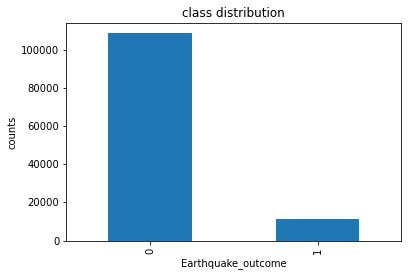

In [39]:
eq_all['mag_outcome'].value_counts().plot(kind='bar',)
plt.xlabel('Earthquake_outcome')
plt.ylabel('counts')
plt.title('class distribution');

**Save the data of fixed rolling window and live unknown prediction data in sql database using sql engine**

In [40]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Earthquakedata.db')
eq_all.to_sql('Earthquake_features', engine, index=False,if_exists='replace')

In [41]:
engine = create_engine('sqlite:///Earthquakedata_predict.db')
predict_unknown.to_sql('Earthquake_predict', engine, index=False,if_exists='replace')